In [0]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Introduction to graph theory

## Graph definition

A graph is defined as a set of points, referred to as the **vertices or nodes**, and lines, referred to as the **edges**

$\mathcal{G} = \{ \mathcal{V}, \mathcal{E} \}$ 

$\mathcal{V} = \{ \mathcal{v}_1, \mathcal{v}_2, \dots,\mathcal{v}_N \}$ where $N$ the amount of nodes in the graph 

$\mathcal{E} = \{ \mathcal{e}(\mathcal{v}_i, \mathcal{v}_j)\}$ where $i,j$ are connected vertices

We can define the graph $\mathcal{G}$ in terms of its adjacency matrix $\mathcal{A}$

$\mathcal{A}_{ij} = 1 \iff \mathcal{e}(\mathcal{v}_i, \mathcal{v}_j) \in \mathcal{E}$, else $0$

The adjacency graph can also be weighted where we perform the following  

$\mathcal{A}_{ij} = w_{ij} \iff \mathcal{e}(\mathcal{v}_i, \mathcal{v}_j) \in \mathcal{E}$, else $0$

**Example of a graph**

We can represent a linear chain of 6 nodes through the following adjacency matrix

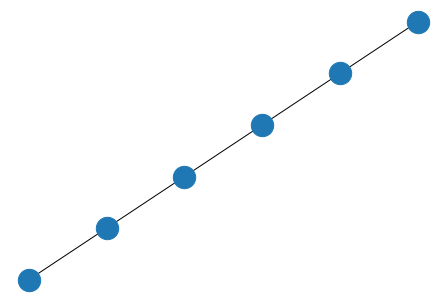

In [0]:
A= np.array([[0,1,0,0,0,0],
             [1,0,1,0,0,0],
             [0,1,0,1,0,0],
             [0,0,1,0,1,0],
             [0,0,0,1,0,1],
             [0,0,0,0,1,0]])
G=nx.from_numpy_matrix(A)
pos = dict(zip(range(6), [[0,0],[1,1],[2,2],[3,3],[4,4],[5,5]]))
nx.draw(G,pos, node_size=500)

The weighted version of this graph where we have alternating edge has an adjacency matrix 

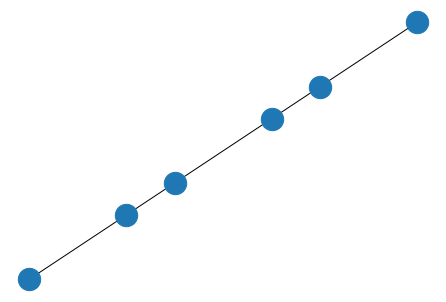

In [0]:
A= np.array([[0,1,0,0,0,0],
             [1,0,10,0,0,0],
             [0,10,0,1,0,0],
             [0,0,1,0,10,0],
             [0,0,0,10,0,1],
             [0,0,0,0,1,0]])
G=nx.from_numpy_matrix(A)
pos = dict(zip(range(6), [[0,0],[1,1],[1.5,1.5],[2.5,2.5],[3,3],[4,4]]))
nx.draw(G, pos,node_size=500)

## Graph Laplacian

The graph Laplacian $\mathcal{L}$ is defined as 

$\mathcal{L} = \mathcal{D} - \mathcal{A}$

where the degree matrix $\mathcal{D}$

$\mathcal{D} = \sum_{j} \mathcal{A}_{ij} $

The Laplacian $\mathcal{L}$ is defined as the discrete Laplacian operator $\nabla^2$ defined on the graph domain and thus is indicative if the *smoothness* of the neighbourhood of each node in the graph.

The Laplacian matrix $\mathcal{L}$ is Hermitian and thus has a set of real and non-negative eigenvalues and orthogonal eigenvectors characterized by the diagonal matrix $\Lambda$ and $U$.

These eigenvectors form a Fourier basis to the graph and contain information about 


*   Global structure of the graph
*   Connectivity in the graph



# Message Passing simplified

Message passing neural network are a general class of neural networks that take a graph $\mathcal{G}$ and learns to update the the graph feature, i.e. the vertex or edge features, based on the surrounding environment.

Central to these networks are the 


*   Message function
*   Readout function

The message function takes the features from the node and its surrounding neighbour and aggregates this into a new representation that contains not only the features from the node but also the surrounding nodes based on the local subgraph structure.

An simple and intiutive message function can be constructed using the adjacency matrix as was explained in **Semi-Supervised classification with graph convolutional networks** 

## Semi-Supervised classification with graph convolutional networks

Given an adjacency matrix *$\mathcal{A}$* ($N \times N$ matrix) and a feature vector *X* (*N $\times$ F*, with *F* the number of features per node) the spatial graph convolution later is defined as following when using the non-linearity *h*

$\mathcal{A}^{*} = \mathcal{A}+I_{N}$

$ D_{ii} = \sum_{j} \mathcal{A}_{ij}^{*}$

$X^{(L+1)} = h \left(D^{-\frac{1}{2}}\mathcal{A}^{*}D^{-\frac{1}{2}}X^{(L)}W^{(L)}\right)$

Where $W^{(L)}$ is the spatial graph filter that is learned in layer *L*. As can be seen, each layer transforms the feature vector in such a way that it takes neighbourhood information into account.

**Reference**
*Semi-Supervised classification with graph convolutional networks* (https://arxiv.org/pdf/1609.02907.pdf)

The product of $D^{-\frac{1}{2}}\mathcal{A}^{*}D^{-\frac{1}{2}}X^{(L)}$ is a first order approximation to the eigenvector matrix $U$ of the graph Laplacian $\mathcal{L}$ and serves as a neighbourhood aggregator that takes the nearest neighbour into account.

As such we will use this operator to illustrate the main mechanism of message passing network.


### Heat diffusion - an illustration of information flux

Suppose we have 2 metal, one of length 4 and one of length 2


1.   The long rod is kept at a constant temperature of 250 K (-23.15° C)
2.   The short rod is kept at a constant temperature of 500 K (226.85° C)

These two rods can be represented by 2 seperate graphs and 2 feature vectors describing the temperature per unit of length i.e. the vertex features of the graph

$$\mathcal{A}_1=\begin{bmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}, x_1= \begin{bmatrix} 250\\ 250  \\ 250  \\ 250 \end{bmatrix}$$

$$\mathcal{A}_2=\begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix}, x_1= \begin{bmatrix} 500 \\ 500 \end{bmatrix}$$

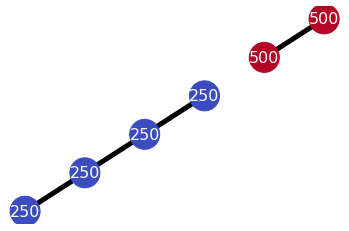

In [0]:
A= np.array([[0,1,0,0,0,0],
             [1,0,10,0,0,0],
             [0,10,0,1,0,0],
             [0,0,1,0,0,0],
             [0,0,0,0,0,1],
             [0,0,0,0,1,0]])
G=nx.from_numpy_matrix(A)
pos = dict(zip(range(6), [[0,0],[1,1],[2,2],[3,3],[4,4],[5,5]]))
labels=dict(zip(range(0,6), ["250", "250", "250", "250", "500", "500"]))
nx.draw_networkx_labels(G,pos,labels,font_size=16, font_color="w")
nx.draw(G, pos, node_size=900, node_color=[250,250,250,250,500, 500],width=5, vmin=250, vmax=500, cmap="coolwarm")

Suppose we bring these 2 bars into contact with one and another, i.e. make a graph out of the two smaller graphs by connecting the two ends. 

$$\mathcal{A}=\begin{bmatrix} 0 & 1 & 0 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0  & 0 & 0\\ 0 & 1 & 0 & 1  & 0 & 0\\ 0 & 0 & 1 & 0  & 0.3 & 0 \\ 0 & 0 & 0 & 0.3  & 0 & 1 \\ 0 & 0 & 0 & 0  & 1 & 0\end{bmatrix}, x_1= \begin{bmatrix} 250\\ 250  \\ 250  \\ 250 \\ 500 \\ 500 \end{bmatrix}$$

Where we have chosen a reduced value for the connection between the two subgraphs to model the contact surface between the two rods.



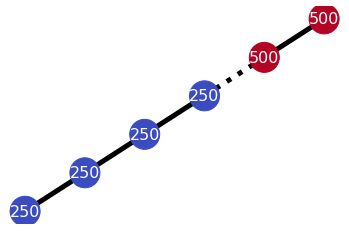

In [0]:
A= np.array([[0,1,0,0,0,0],
             [1,0,1,0,0,0],
             [0,1,0,1,0,0],
             [0,0,1,0,0.3,0],
             [0,0,0,0.3,0,1],
             [0,0,0,0,1,0]])
G=nx.from_numpy_matrix(A)
pos = dict(zip(range(6), [[0,0],[1,1],[2,2],[3,3],[4,4],[5,5]]))
labels=dict(zip(range(0,6), ["250", "250", "250", "250", "500", "500"]))
nx.draw_networkx_labels(G,pos,labels,font_size=16, font_color="w")
nx.draw(G, pos, node_size=900, node_color=[250,250,250,250,500, 500], edgelist=G.edges, edge_color=["black", "black", "black", "white", "black", "black", "black"],width=5,vmin=250, vmax=500, cmap="coolwarm")
nx.draw_networkx_edges(G, pos,edgelist=[(3, 4)], width=5,style="dotted")

Heat diffusion across two systems of differing temperatures will cause a gradient across the system where 

1.   The segment that forms the contact between the two interacting systems will responds first
2.   Due to the change in these segments the nearby segments will respond as well and adapt their state
3.   This process repeats untill a equilibrium value has been reached where the flux that goes into the segment is compensated by the flux that goes out it

We will illustrate this process by applying the message function to the system



In [0]:
def normalize_adjacency(A):
  D = np.sum(A, 0) # node degrees
  D_hat = np.diag((D + 1e-5)**(-0.5))
  return D_hat.dot(A).dot(D_hat)
A_hat = normalize_adjacency(A)
feature_vectors = [[0, 0, 0, 0, 1, 1]]
for idx in range(100):
  x = np.array(feature_vectors[idx]).T
  feature_vectors.append(((A_hat.dot(x)).T).tolist())

Text(0.5, 1.0, '4 message passing cycles')

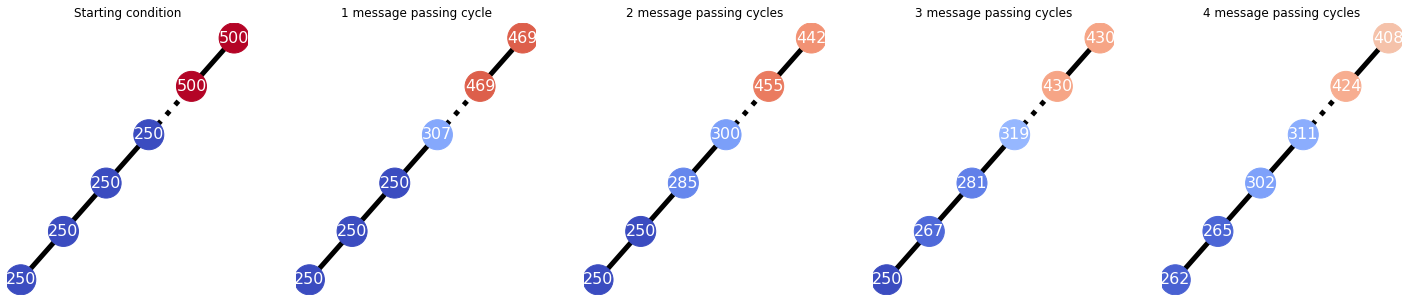

In [0]:
fig, axes = plt.subplots(1,5,figsize=(25,5))

nx.draw_networkx_labels(G,pos,labels,font_size=16, font_color="w", ax=axes[0])
nx.draw(G, pos, node_size=900, node_color=[250,250,250,250,500, 500], edgelist=G.edges, edge_color=["black", "black", "black", "white", "black", "black", "black"],width=5,vmin=250, vmax=500, cmap="coolwarm", ax=axes[0])
nx.draw_networkx_edges(G, pos,edgelist=[(3, 4)], width=5,style="dotted", ax=axes[0])

for idx in [1,2,3,4]:   
  labels_updated = dict(zip(range(6), [str(int(vertex_feature*250+250)) for vertex_feature in feature_vectors[idx]]))
  node_colors_updated=[int(vertex_feature*250+250) for vertex_feature in feature_vectors[idx]]
  nx.draw_networkx_labels(G,pos,labels_updated,font_size=16, font_color="w", ax=axes[idx])
  nx.draw(G, pos, node_size=900, node_color=node_colors_updated, edgelist=G.edges, edge_color=["black", "black", "black", "white", "black", "black", "black"],width=5, vmin=250, vmax=500, cmap="coolwarm", ax=axes[idx])
  nx.draw_networkx_edges(G, pos,edgelist=[(3, 4)], width=5,style="dotted", ax=axes[idx])

axes[0].set_title("Starting condition")
axes[1].set_title("1 message passing cycle")
axes[2].set_title("2 message passing cycles")
axes[3].set_title("3 message passing cycles")
axes[4].set_title("4 message passing cycles")

As is visible in the graph plots, message passing follows the process described above. Each time we apply the aggregator operator to the current vertex feature vector we get a new vector that has been updated accordingly to the current state of the vertex feature and its surrounding vertices.

However it is important to highlight the difference between the process of diffusion and that of message passage. When we look at the evolution of the vertex features in function of time 

Text(0.5, 0, 'Number of MP cycles')

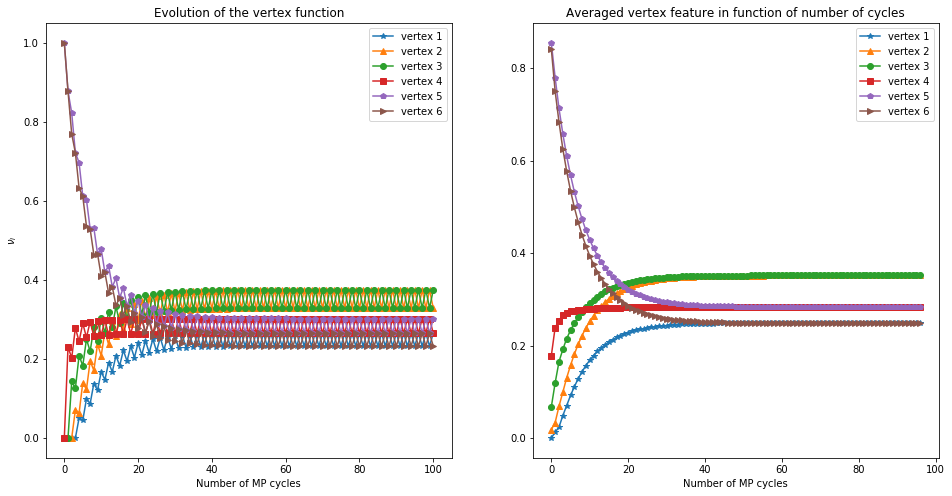

In [0]:
def runningMean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

fig, (ax1,  ax2) = plt.subplots(1,2,figsize=(16,8))
markers=["*", "^", "o", "s", "p", ">"]
for idx in range(6):
  feature_vec = np.array(feature_vectors)[:,idx]
  moving_average = runningMean(feature_vec, 4)
  ax1.plot(range(101), np.array(feature_vectors)[:,idx],marker=markers[idx], label="vertex "+str(idx+1))
  ax2.plot(range(len(moving_average)-4), moving_average[:-4], marker=markers[idx],label="vertex "+str(idx+1))
ax1.legend()
ax1.set_title("Evolution of the vertex function")
ax2.legend()
ax2.set_title("Averaged vertex feature in function of number of cycles")
ax1.set_ylabel(r"$\nu_i$")
ax1.set_xlabel("Number of MP cycles")
ax2.set_xlabel("Number of MP cycles")

We can clearly see that the vertices **do not converge to a homogeneous value** instead we take note that, when looking at the averaged overview we see that vertices that occupy the "same" position in the graph, e.g both the outer vertices 1 and 6, will converge to the same value/similar value



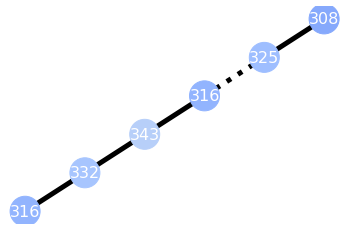

In [0]:
idx=100
labels_updated = dict(zip(range(6), [str(int(vertex_feature*250+250)) for vertex_feature in feature_vectors[idx]]))
node_colors_updated=[int(vertex_feature*250+250) for vertex_feature in feature_vectors[idx]]
nx.draw_networkx_labels(G,pos,labels_updated,font_size=16, font_color="w")
nx.draw(G, pos, node_size=900, node_color=node_colors_updated, edgelist=G.edges, edge_color=["black", "black", "black", "white", "black", "black", "black"],width=5, vmin=250, vmax=500, cmap="coolwarm")
nx.draw_networkx_edges(G, pos,edgelist=[(3, 4)], width=5,style="dotted")

# Time evolution in function of graph size

## 7 vertices

In [0]:
A1= np.array([[0,1,0,0,0,0,0],
             [1,0,1,0,0,0,0],
             [0,1,0,1,0,0,0],
             [0,0,1,0,0.3,0,0],
             [0,0,0,0.3,0,1,0],
             [0,0,0,0,1,0,1],
             [0,0,0,0,0,1,0]])

In [0]:
def normalize_adjacency(A):
  D = np.sum(A, 0) # node degrees
  D_hat = np.diag((D + 1e-5)**(-0.5))
  return D_hat.dot(A).dot(D_hat)
A_hat = normalize_adjacency(A1)
feature_vectors = [[0, 0, 0, 0, 1, 1,1]]
for idx in range(100):
  x = np.array(feature_vectors[idx]).T
  feature_vectors.append(((A_hat.dot(x)).T).tolist())

Text(0.5, 0, 'Number of MP cycles')

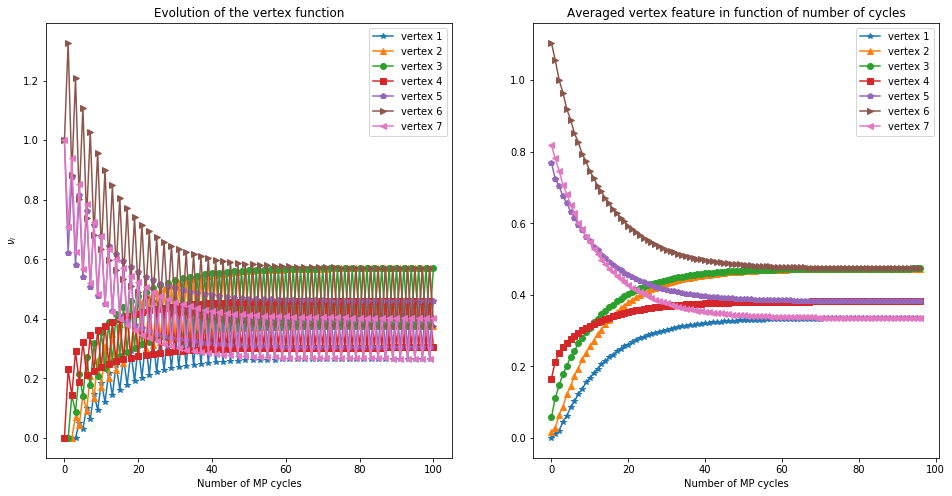

In [0]:
def runningMean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

fig, (ax1,  ax2) = plt.subplots(1,2,figsize=(16,8))
markers=["*", "^", "o", "s", "p", ">","<"]
for idx in range(7):
  feature_vec = np.array(feature_vectors)[:,idx]
  moving_average = runningMean(feature_vec, 4)
  ax1.plot(range(101), np.array(feature_vectors)[:,idx],marker=markers[idx], label="vertex "+str(idx+1))
  ax2.plot(range(len(moving_average)-4), moving_average[:-4], marker=markers[idx],label="vertex "+str(idx+1))
ax1.legend()
ax1.set_title("Evolution of the vertex function")
ax2.legend()
ax2.set_title("Averaged vertex feature in function of number of cycles")
ax1.set_ylabel(r"$\nu_i$")
ax1.set_xlabel("Number of MP cycles")
ax2.set_xlabel("Number of MP cycles")

## 8 vertices

In [0]:
A2= np.array([[0,1,0,0,0,0,0,0],
             [1,0,1,0,0,0,0,0],
             [0,1,0,1,0,0,0,0],
             [0,0,1,0,0.3,0,0,0],
             [0,0,0,0.3,0,1,0,0],
             [0,0,0,0,1,0,1,0],
             [0,0,0,0,0,1,0,1],
             [0,0,0,0,0,0,1,0]])

A_hat = normalize_adjacency(A2)
feature_vectors = [[0, 0, 0, 0, 1, 1,1,1]]
for idx in range(100):
  x = np.array(feature_vectors[idx]).T
  feature_vectors.append(((A_hat.dot(x)).T).tolist())

Text(0.5, 0, 'Number of MP cycles')

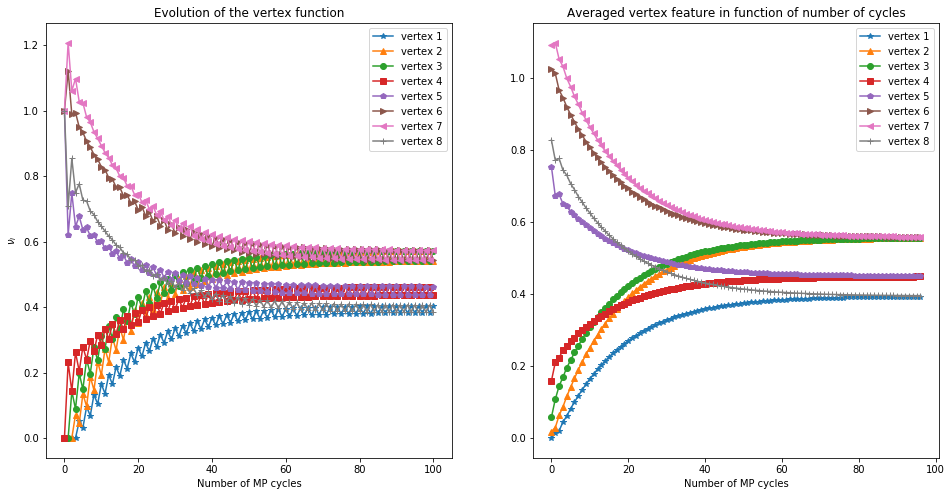

In [0]:
fig, (ax1,  ax2) = plt.subplots(1,2,figsize=(16,8))
markers=["*", "^", "o", "s", "p", ">","<","+"]
for idx in range(8):
  feature_vec = np.array(feature_vectors)[:,idx]
  moving_average = runningMean(feature_vec, 4)
  ax1.plot(range(101), np.array(feature_vectors)[:,idx],marker=markers[idx], label="vertex "+str(idx+1))
  ax2.plot(range(len(moving_average)-4), moving_average[:-4], marker=markers[idx],label="vertex "+str(idx+1))
ax1.legend()
ax1.set_title("Evolution of the vertex function")
ax2.legend()
ax2.set_title("Averaged vertex feature in function of number of cycles")
ax1.set_ylabel(r"$\nu_i$")
ax1.set_xlabel("Number of MP cycles")
ax2.set_xlabel("Number of MP cycles")
#ax2.set_ylim(0.5,0.6)

## Conclusion

Message passing can be viewed as analogous to a diffusion process in that it corresponds the flux of information from one area of an object to other areas of the object by which it is connected implicitely.

Unlike the diffusion process the message passing algorithm does **not** converge to a homogeneous value across the whole system. Instead the converged value will depend on the **graph structure/neighbourhood structure** and the **initial vertex features**.

As such the message passing algorithm is said to **find a unique representation of each vertex in the graph based on its initial starting value and local structure**.

The information aggregation reaches a stable condition after a number of cycles which is **graph size dependent**.
